## Task B- KNN

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [53]:
X_train= pd.read_table('X_train.txt', delim_whitespace= True)
Y_train= pd.read_table('y_train.txt', delim_whitespace= True)
X_test= pd.read_table('X_test.txt', delim_whitespace= True)
Y_test= pd.read_table('y_test.txt', delim_whitespace= True)

In [54]:
X_train= np.array(X_train)
Y_train= np.array(Y_train.T)[0]
X_test= np.array(X_test)
Y_test= np.array(Y_test.T)[0]

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [56]:
x = []

for i in range(1,50):  #K taking values from 1 to 50
    knn_model = KNeighborsClassifier(i)
    scores = cross_val_score(knn_model, X_train, Y_train, cv=10, scoring='f1_macro')
    print("Accuracy for each fold: {}".format(scores))   
    print("Mean Accuracy: {}".format(np.mean(scores))) 
    avg_score = np.mean(scores)
    x = x + [avg_score]

Accuracy for each fold: [0.90635354 0.81156802 0.91064599 0.86124209 0.90436957 0.85489135
 0.90919263 0.91879709 0.92241406 0.90982146]
Mean Accuracy: 0.8909295802606124
Accuracy for each fold: [0.86637163 0.7898532  0.89315314 0.86472576 0.90209128 0.87315564
 0.89440054 0.90120832 0.90139699 0.89452711]
Mean Accuracy: 0.8780883617170719
Accuracy for each fold: [0.90946285 0.81250507 0.91467786 0.87239824 0.91455805 0.88018928
 0.9204426  0.93674543 0.91888225 0.93840662]
Mean Accuracy: 0.9018268244842307
Accuracy for each fold: [0.88983558 0.82704328 0.91298094 0.88302953 0.91362401 0.87642822
 0.91083905 0.93974885 0.92591943 0.9250491 ]
Mean Accuracy: 0.9004497992956205
Accuracy for each fold: [0.92269892 0.82112975 0.91141097 0.88036836 0.91534929 0.87208053
 0.9306833  0.93671291 0.93596463 0.93018168]
Mean Accuracy: 0.905658033872521
Accuracy for each fold: [0.91605733 0.82805672 0.90956604 0.88337481 0.91362021 0.8775091
 0.9248626  0.93689893 0.9317814  0.92861957]
Mean Accur

Accuracy for each fold: [0.92054101 0.82920383 0.9101613  0.86466589 0.90728549 0.85497469
 0.90589604 0.91254344 0.93276945 0.93594751]
Mean Accuracy: 0.8973988650819138


In [72]:
import operator
index, value = max(enumerate(x), key=operator.itemgetter(1)) # Storing Best Value of F1 score and K
print("Best F1 Score:", value)
print("corresponding K value:",index+1) 

Best F1 Score: 0.9092176941861627
corresponding K value: 10


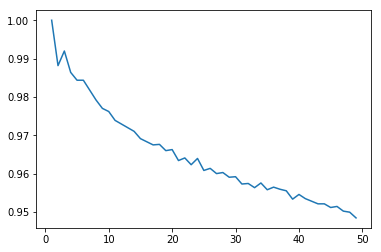

In [58]:
#plotting accuracy verses K plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
accuracy= []
k=[]

for i in range(1,50):
    knn_model = KNeighborsClassifier(i)
    k=k+[i]
    knn_model.fit(X_train, Y_train)
    knn_acc = metrics.accuracy_score(Y_train, knn_model.predict(X_train))
    accuracy= accuracy+ [knn_acc]
    
plt.plot(k[0:], accuracy[0:])

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=index+1)
knn_model.fit(X_train, Y_train)

knn_acc = metrics.accuracy_score(Y_test, knn_model.predict(X_test))
print ("KNN Testing Accuracy: {}".format(knn_acc))

Confusion_matrix=metrics.confusion_matrix(Y_test, knn_model.predict(X_test), labels=None, sample_weight=None)
print ("Confusion matrix:", Confusion_matrix)

Average_f1_score= metrics.f1_score(Y_test, knn_model.predict(X_test), pos_label=1, average='macro', sample_weight=None)
print ("Multi-class averaged F1-score:",Average_f1_score)

KNN Testing Accuracy: 0.906653088934148
Confusion matrix: [[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 484   0]
 [  0   0   0   2   2 533]]
Multi-class averaged F1-score: 0.9037726928656652


## Task C- Elastic Net

In [107]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [108]:
Alpha= [1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2]
Ratio=[0,0.15,0.5,0.7,1]

In [109]:
overall_best_score=0
best_score= 0
XX=[]
current_score=0

for i in Alpha:

    for j in Ratio:
        enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=i, l1_ratio=j, max_iter=10)
        scores_enet = cross_val_score(enet, X_train, Y_train, cv=10, scoring='f1_macro')
        print("Accuracy for each fold: {}".format(scores_enet))   
        print("Mean Accuracy: {}".format(np.mean(scores_enet))) 
        
        current_score= np.mean(scores_enet)
        XX.append(current_score)
        if(current_score>best_score):
            best_score= current_score

    if(best_score>overall_best_score):
        overall_best_score= best_score
        Alpha_best= i
        Ratio_best= j
        
print("Best Alpha value:",Alpha_best)
print("Best L1 Ratio:",Ratio_best)  
print("Best F1 Score:", best_score)

Accuracy for each fold: [0.98828767 0.86136155 0.93004469 0.8161904  0.92117495 0.95445429
 0.98658955 0.93956669 0.97325105 0.97857241]
Mean Accuracy: 0.9349493243346275
Accuracy for each fold: [0.98314344 0.85085604 0.95575707 0.82104337 0.90662303 0.94292717
 0.97371371 0.97992659 0.9584726  0.98104462]
Mean Accuracy: 0.9353507632853761
Accuracy for each fold: [0.98403936 0.83096238 0.95490842 0.82584667 0.92496377 0.94817972
 0.98462776 0.96520472 0.95361357 0.97823166]
Mean Accuracy: 0.9350578039590213
Accuracy for each fold: [0.98116684 0.81865313 0.94500025 0.82702668 0.9170023  0.94132113
 0.98560537 0.96661507 0.96336406 0.97232665]
Mean Accuracy: 0.9318081487575591
Accuracy for each fold: [0.98339873 0.85036026 0.93907813 0.80808749 0.91165838 0.92653156
 0.96873041 0.95550137 0.96499383 0.98109331]
Mean Accuracy: 0.928943347257994
Accuracy for each fold: [0.93843552 0.85654293 0.94473668 0.84161096 0.93147114 0.94411917
 0.97421796 0.97235185 0.92197459 0.95572264]
Mean Accu

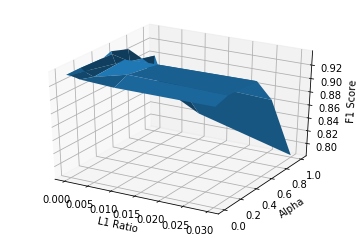

In [110]:
from mpl_toolkits.mplot3d import Axes3D
i=0
Axis=np.zeros([5,6]) #z axis for surface plot
for j in range(0,5):
    for k in range(0,6):
        Axis[j,k]=XX[i]
        i=i+1


x = Alpha  
y = Ratio
X, Y = np.meshgrid(x, y)
Z = Axis 


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('L1 Ratio')
ax.set_ylabel('Alpha')
ax.set_zlabel('F1 Score')
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, antialiased=True)
plt.show()

In [111]:
Retrain_enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=Alpha_best, l1_ratio=Ratio_best, max_iter=10)
Retrain_enet.fit(X_train, Y_train)

labels_predict= Retrain_enet.predict(X_test)
print("predicted labels:",labels_predict)

Accuracy = metrics.accuracy_score(Y_test, Retrain_enet.predict(X_test))
print ("Enet Testing Accuracy: {}".format(Accuracy))

Confusion_matrix=metrics.confusion_matrix(Y_test, Retrain_enet.predict(X_test), labels=None, sample_weight=None)
print ("Enet Confusion matrix:", Confusion_matrix)

Average_f1_score= metrics.f1_score(Y_test, Retrain_enet.predict(X_test), pos_label=1, average='macro', sample_weight=None)
print ("Enet Multi-class averaged F1-score:",Average_f1_score)

predicted labels: [5 5 5 ... 2 2 1]
Enet Testing Accuracy: 0.9263408010862186
Enet Confusion matrix: [[489   3   4   0   0   0]
 [ 34 389  45   1   2   0]
 [ 11   8 400   0   1   0]
 [  2   3   1 405  80   0]
 [  1   0   0  21 509   0]
 [  0   0   0   0   0 537]]
Enet Multi-class averaged F1-score: 0.9242184696261492


## Task D- Support Vector Machine

In [87]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [88]:
Gamma= [1e-3, 1e-4]
C= [1, 10, 100, 1000]

In [89]:
overall_best_score=0
best_score= 0
current_score=0
XX=[]
for i in Gamma:
    
    for j in C:
        
        svc_model = svm.SVC(kernel='rbf', gamma=i, C=j)
        scores_svc = cross_val_score(svc_model, X_train, Y_train, cv=10, scoring='f1_macro')
        
        print("Accuracy for each fold: {}".format(scores_svc))   
        print("Mean Accuracy: {}".format(np.mean(scores_svc))) 
        
        current_score= np.mean(scores_svc)
        XX.append(current_score)
        
        if(current_score>best_score):
            best_score= current_score
            
    if(best_score>overall_best_score):
        overall_best_score= best_score
        Gamma_best= i
        C_best= j
        
print("Best Gamma value: ",Gamma_best)
print("Best C value: ",C_best)
print("Best F1 Score: ", best_score)

Accuracy for each fold: [0.95925431 0.83301309 0.92482312 0.8191475  0.91186111 0.8936819
 0.9322585  0.90301774 0.94278782 0.94109471]
Mean Accuracy: 0.9060939803403066
Accuracy for each fold: [0.97840762 0.86448835 0.95618942 0.84863279 0.95276547 0.93173218
 0.98261535 0.96820653 0.96419155 0.96953421]
Mean Accuracy: 0.9416763469196138
Accuracy for each fold: [0.97603465 0.85643901 0.96184626 0.86335957 0.9616319  0.9555038
 0.98714363 0.96761636 0.97853811 0.97861148]
Mean Accuracy: 0.948672477761853
Accuracy for each fold: [0.97851929 0.86108365 0.96309109 0.86506018 0.96142828 0.95388634
 0.98588623 0.97051561 0.97731941 0.98613509]
Mean Accuracy: 0.9502925178530368
Accuracy for each fold: [0.80690727 0.71111232 0.83318834 0.72831452 0.81406691 0.76882877
 0.7954595  0.79800701 0.83168943 0.83765188]
Mean Accuracy: 0.7925225948029889
Accuracy for each fold: [0.95925431 0.83231798 0.92482312 0.81774471 0.91330665 0.89221029
 0.93510112 0.90293144 0.94278782 0.94109471]
Mean Accura

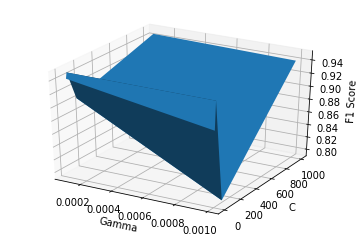

In [91]:

i=0
Axis=np.zeros([4,2]) #z axis for surface plot
for j in range(0,4):
    for k in range(0,2):
        Axis[j,k]=XX[i]
        i=i+1


X, Y = np.meshgrid(Gamma, C)
Z = Axis 


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_zlabel('F1 Score')
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, antialiased=True)
plt.show()

In [112]:
Retrain_svm = svm.SVC(kernel='rbf', gamma=Gamma_best, C=C_best)
Retrain_svm.fit(X_train, Y_train)

labels_predict= Retrain_svm.predict(X_test)
print("predicted labels:",labels_predict)

Accuracy = metrics.accuracy_score(Y_test, Retrain_svm.predict(X_test))
print ("SVM Testing Accuracy: {}".format(Accuracy))

Confusion_matrix=metrics.confusion_matrix(Y_test, Retrain_svm.predict(X_test), labels=None, sample_weight=None)
print ("SVM Confusion matrix:", Confusion_matrix)

Average_f1_score= metrics.f1_score(Y_test, Retrain_svm.predict(X_test), pos_label=1, average='macro', sample_weight=None)
print ("SVM Multi-class averaged F1-score:",Average_f1_score)

predicted labels: [5 5 5 ... 2 2 2]
SVM Testing Accuracy: 0.9657162253903598
SVM Confusion matrix: [[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 519   0]
 [  0   0   0   0   0 537]]
SVM Multi-class averaged F1-score: 0.9657497427160174


## Task E- Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [114]:
trees= [200,500,700]
depth= [300,500,600]

In [115]:
overall_best_score=0
best_score= 0
XX=[]
current_score=0

for i in trees:
    
    for j in depth:
        
        rf_model = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=42)
        scores_rf = cross_val_score(rf_model, X_train, Y_train, cv=10, scoring='f1_macro')
        print("Accuracy for each fold: {}".format(scores_rf))   
        print("Mean Accuracy: {}".format(np.mean(scores_rf))) 
        current_score= np.mean(scores_rf)
        XX.append(current_score)
        
        if(current_score>best_score):
            best_score= current_score
            
    if(best_score>overall_best_score):
        overall_best_score= best_score
        Number_of_trees= i
        Tree_depth= j
        
print("best number of trees value:",Number_of_trees)
print("best trees depth:",Tree_depth)
print("best F1 Score:", best_score)


Accuracy for each fold: [0.93083821 0.87754813 0.96798978 0.84094369 0.9084641  0.86939827
 0.97604705 0.9823     0.95324942 0.96807847]
Mean Accuracy: 0.927485711602517
Accuracy for each fold: [0.93083821 0.87754813 0.96798978 0.84094369 0.9084641  0.86939827
 0.97604705 0.9823     0.95324942 0.96807847]
Mean Accuracy: 0.927485711602517
Accuracy for each fold: [0.93083821 0.87754813 0.96798978 0.84094369 0.9084641  0.86939827
 0.97604705 0.9823     0.95324942 0.96807847]
Mean Accuracy: 0.927485711602517
Accuracy for each fold: [0.93165761 0.87935015 0.97166269 0.8387551  0.92680522 0.8740998
 0.9758385  0.9824924  0.95316371 0.96051517]
Mean Accuracy: 0.9294340340455127
Accuracy for each fold: [0.93165761 0.87935015 0.97166269 0.8387551  0.92680522 0.8740998
 0.9758385  0.9824924  0.95316371 0.96051517]
Mean Accuracy: 0.9294340340455127
Accuracy for each fold: [0.93165761 0.87935015 0.97166269 0.8387551  0.92680522 0.8740998
 0.9758385  0.9824924  0.95316371 0.96051517]
Mean Accuracy:

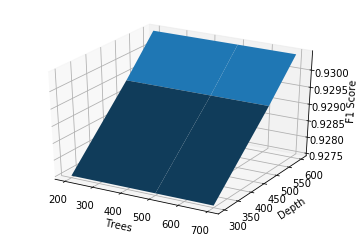

In [116]:
from mpl_toolkits.mplot3d import Axes3D

i=0
Axis=np.zeros([3,3]) #z axis for surface plot
for j in range(0,3):
    for k in range(0,3):
        Axis[j,k]=XX[i]
        i=i+1


X, Y = np.meshgrid(trees, depth)
Z = Axis 


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('Trees')
ax.set_ylabel('Depth')
ax.set_zlabel('F1 Score')
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, antialiased=True)
plt.show()

In [117]:
from sklearn import metrics

Retrain_rf = RandomForestClassifier(n_estimators= Number_of_trees, max_depth=Tree_depth, random_state=42)
Retrain_rf.fit(X_train, Y_train)

labels_predict= Retrain_rf.predict(X_test)
print("predicted labels:",labels_predict)

Accuracy = metrics.accuracy_score(Y_test, Retrain_rf.predict(X_test))
print ("Random Forest Testing Accuracy: {}".format(Accuracy))

Confusion_matrix=metrics.confusion_matrix(Y_test, Retrain_rf.predict(X_test), labels=None, sample_weight=None)
print ("Random Forest Confusion matrix:", Confusion_matrix)

Average_f1_score= metrics.f1_score(Y_test, Retrain_rf.predict(X_test), pos_label=1, average='macro', sample_weight=None)
print ("Random Forest Multi-class averaged F1-score:",Average_f1_score)

predicted labels: [5 5 5 ... 2 2 1]
Random Forest Testing Accuracy: 0.9287169042769857
Random Forest Confusion matrix: [[482   5   9   0   0   0]
 [ 29 435   7   0   0   0]
 [ 20  45 355   0   0   0]
 [  0   0   0 435  56   0]
 [  0   0   0  39 492   0]
 [  0   0   0   0   0 537]]
Random Forest Multi-class averaged F1-score: 0.926634336197807
